[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 0.35281047  0.97622364  0.99096765  0.25761068 -0.59080552 -0.86055709
  0.56416891  0.96682645  0.48996191 -0.46190141]


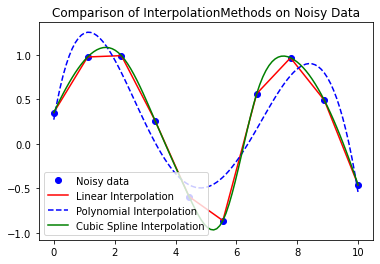

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

np.random.seed(0)
x_data = np.linspace(0, 10, 10)
x_data = np.sort(x_data)
#y with added noise so the sin(x) function isn't obvious
y_data = np.sin(x_data) + 0.2 * np.random.normal(size=len(x_data))

print(x_data)
print(y_data)

x_fine = np.linspace(0, 10, 100)

# Linear interpolation values
y_linear = np.interp(np.linspace(0, 10, 100), x_data, y_data)

# Polynomial interpolation (degree 5 for a good balance between fit and overfitting)
polynomial_coeffs = np.polyfit(x_data, y_data, deg=5)
y_poly = np.polyval(polynomial_coeffs, x_fine)

# Cubic spline interpolation
cubic_spline = CubicSpline(x_data, y_data)
y_spline = cubic_spline(x_fine)

# Plot original noisy data and interpolations
plt.plot(x_data, y_data, 'bo',label="Noisy data")
plt.plot(x_fine, y_linear, 'r-',label="Linear Interpolation")
plt.plot(x_fine, y_poly, 'b--',label="Polynomial Interpolation")
plt.plot(x_fine, y_spline, 'g-',label="Cubic Spline Interpolation")
plt.title("Comparison of Interpolation Methods on Noisy Data")
          
plt.legend()
plt.show()

#Linear interpolation does not work well for noisy data because it does not smooth out noise - creating a piecewise approximation
#Compare this to Polynomial interpolation which is smooth but also very sensitive to noise and overfitting - high degree polynomials are the culprit
#Cubic spline only uses first and second derivatives and is smoother than linear while better at handling noise than both others